In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
from  matplotlib import style
style.use('ggplot')
import squarify

In [2]:
df = pd.read_csv('SF_data/Spending_Revenue_cleaned.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,Fiscal Year,Revenue or Spending,Related Govt Units,Organization Group,Department,Program,Character,Object,Sub-object,Fund,Fund Category,Amount
0,1999,Revenue,No,Public Protection,ADP Adult Probation,Community Services,Charges For Services,Public Safety Service Charges,Other Public Safety Charges,General Fund,Operating,26742.00
1,1999,Spending,No,Public Protection,PDR Public Defender,Criminal And Special Defense,Non Personnel Services,Training,Training Costs Paid To Emplye,General Fund,Operating,425.83
2,1999,Spending,No,"Public Works, Transportation & Commerce",WTR Water Enterprise,Water Facilities Maintenance Projects,Salaries,Permanent Salaries-Misc,Misc-Other Timeoff,Water Operating Fund,Continuing Projects,17433.51
3,1999,Spending,No,General Administration & Finance,ADM Gen Svcs Agency-City Admin,Ag Wts & Measures Inspection,Non Personnel Services,Employee Expenses,Local Field Exp,General Fund,Work Orders/Overhead,24.00
4,1999,Spending,No,"Public Works, Transportation & Commerce",DPW GSA - Public Works,Engineering,Mandatory Fringe Benefits,Unemployment Insurance,Unemployment Insurance,General Fund,Continuing Projects,380.15


In [3]:
df = df[df['Revenue or Spending'] == 'Spending']
df['Revenue or Spending'].value_counts()

Spending    443491
Name: Revenue or Spending, dtype: int64

In [4]:
df_org_sums = df.groupby('Organization Group')[['Amount']].agg('sum')
df_org_sums

,Amount
Organization Group,
Community Health,2.539216e+10
Culture & Recreation,5.184852e+09
General Administration & Finance,3.223812e+10
General City Responsibilities,5.638312e+09
Human Welfare & Neighborhood Development,1.638431e+10
Public Protection,2.016096e+10
"Public Works, Transportation & Commerce",6.008039e+10


In [5]:
years = list(df['Fiscal Year'].unique())

df_year = []
for year in years:
    df_year.append( df[df['Fiscal Year'] == year])

In [6]:
organization_sums = []
for i in range(19):
    organization_sums.append( pd.DataFrame(df_year[i].groupby('Organization Group').Amount.agg('sum')) )
    col_year = years[i]
    organization_sums[i].columns = [col_year]

In [7]:
df_agg = pd.concat(organization_sums, axis=1)
df_agg

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Organization Group,,,,,,,,,,,,,,,,,,,
Community Health,8.819127e+08,8.842978e+08,9.271582e+08,1.003654e+09,1.064095e+09,1.058670e+09,1.085581e+09,1.112982e+09,1.220095e+09,1.308156e+09,1.353216e+09,1.397511e+09,1.451469e+09,1.557973e+09,1.691328e+09,1.741447e+09,1.794130e+09,1.909323e+09,1.949161e+09
Culture & Recreation,1.974674e+08,2.529972e+08,2.899114e+08,2.488100e+08,4.140045e+08,1.772903e+08,1.815215e+08,1.996677e+08,2.227399e+08,2.428873e+08,2.498701e+08,2.556029e+08,2.608336e+08,2.733905e+08,2.821998e+08,2.959834e+08,3.136054e+08,4.660505e+08,3.600183e+08
General Administration & Finance,8.251766e+08,9.721212e+08,1.015377e+09,1.071319e+09,1.141091e+09,1.259537e+09,1.283863e+09,1.409197e+09,1.552262e+09,1.709466e+09,1.768776e+09,1.806280e+09,1.975116e+09,2.109689e+09,2.144975e+09,2.240199e+09,2.394366e+09,2.682615e+09,2.876694e+09
General City Responsibilities,1.717337e+08,1.745403e+08,1.837020e+08,2.889807e+08,2.339664e+08,3.110360e+08,2.468325e+08,2.351464e+08,2.511699e+08,2.741652e+08,2.905794e+08,3.433227e+08,3.457813e+08,3.621585e+08,3.243361e+08,3.672386e+08,3.912837e+08,4.142998e+08,4.280393e+08
Human Welfare & Neighborhood Development,4.638600e+08,4.410693e+08,5.082278e+08,5.591605e+08,6.137050e+08,6.811500e+08,6.730001e+08,7.487133e+08,8.144332e+08,9.041823e+08,9.435892e+08,9.902222e+08,9.400372e+08,9.584808e+08,1.070584e+09,1.131055e+09,1.202186e+09,1.317164e+09,1.423495e+09
Public Protection,6.850420e+08,7.711356e+08,8.228407e+08,8.231038e+08,8.748278e+08,8.262609e+08,8.866845e+08,9.637010e+08,1.028381e+09,1.118819e+09,1.113571e+09,1.138247e+09,1.151597e+09,1.199353e+09,1.267413e+09,1.295625e+09,1.333976e+09,1.398936e+09,1.461445e+09
"Public Works, Transportation & Commerce",2.481711e+09,2.456951e+09,2.656389e+09,2.455332e+09,2.342223e+09,2.238240e+09,2.157588e+09,2.363097e+09,2.786993e+09,2.762879e+09,2.896900e+09,3.254778e+09,3.613409e+09,4.004832e+09,4.235159e+09,4.641050e+09,4.180932e+09,4.433690e+09,4.118238e+09


In [8]:
df_agg.to_csv('SF_spending_organization_groups.csv')

Below is a cluster map, good for showing hierachial data. Maybe not the best option for just organization groups, but can be used well for the data set as whole since the columns in SF data are organized in hierachial format:

    Organization Group > Department > Program > Character

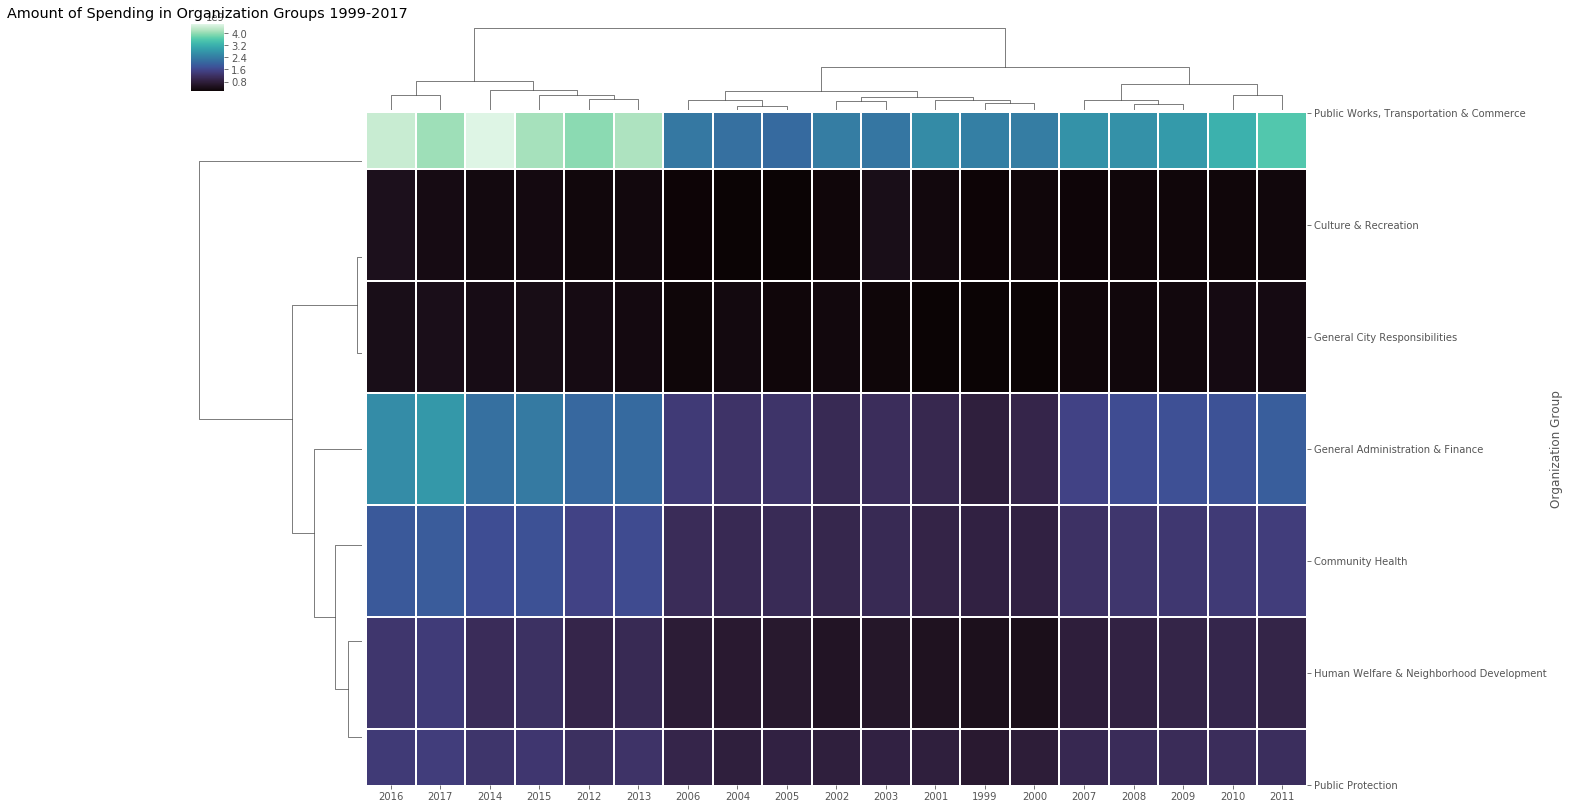

In [18]:
sns.clustermap( df_agg, 
                figsize=(20, 14), 
                cmap='mako',
                linewidths=.75)

plt.title('Amount of Spending in Organization Groups 1999-2017')
plt.show()

In [28]:
plt.savefig('SF_org_groups_hierachial.png')

<Figure size 432x288 with 0 Axes>

Shows trends over time

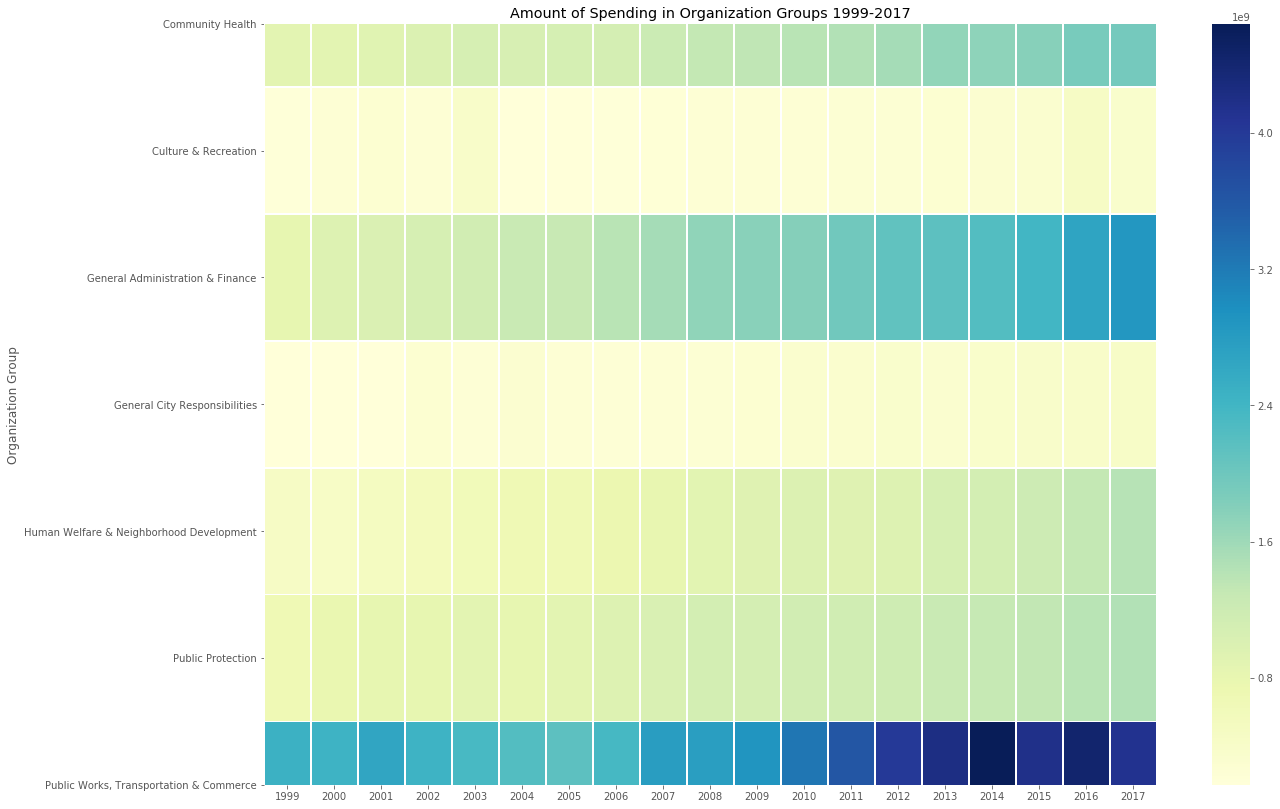

In [27]:
plt.figure(figsize=(20,14))
sns.heatmap( df_agg, 
#                 figsize=(20, 14), 
                cmap='YlGnBu',
                linewidths=.75,
           )
plt.title('Amount of Spending in Organization Groups 1999-2017')
plt.show()

In [30]:
plt.savefig('SF_org_groups_heatmap.png')

<Figure size 432x288 with 0 Axes>

In [10]:
df_transp = df_agg.T
df_transp

Organization Group,Community Health,Culture & Recreation,General Administration & Finance,General City Responsibilities,Human Welfare & Neighborhood Development,Public Protection,"Public Works, Transportation & Commerce"
1999,8.819127e+08,1.974674e+08,8.251766e+08,1.717337e+08,4.638600e+08,6.850420e+08,2.481711e+09
2000,8.842978e+08,2.529972e+08,9.721212e+08,1.745403e+08,4.410693e+08,7.711356e+08,2.456951e+09
2001,9.271582e+08,2.899114e+08,1.015377e+09,1.837020e+08,5.082278e+08,8.228407e+08,2.656389e+09
2002,1.003654e+09,2.488100e+08,1.071319e+09,2.889807e+08,5.591605e+08,8.231038e+08,2.455332e+09
2003,1.064095e+09,4.140045e+08,1.141091e+09,2.339664e+08,6.137050e+08,8.748278e+08,2.342223e+09
2004,1.058670e+09,1.772903e+08,1.259537e+09,3.110360e+08,6.811500e+08,8.262609e+08,2.238240e+09
2005,1.085581e+09,1.815215e+08,1.283863e+09,2.468325e+08,6.730001e+08,8.866845e+08,2.157588e+09
2006,1.112982e+09,1.996677e+08,1.409197e+09,2.351464e+08,7.487133e+08,9.637010e+08,2.363097e+09
2007,1.220095e+09,2.227399e+08,1.552262e+09,2.511699e+08,8.144332e+08,1.028381e+09,2.786993e+09
2008,1.308156e+09,2.428873e+08,1.709466e+09,2.741652e+08,9.041823e+08,1.118819e+09,2.762879e+09


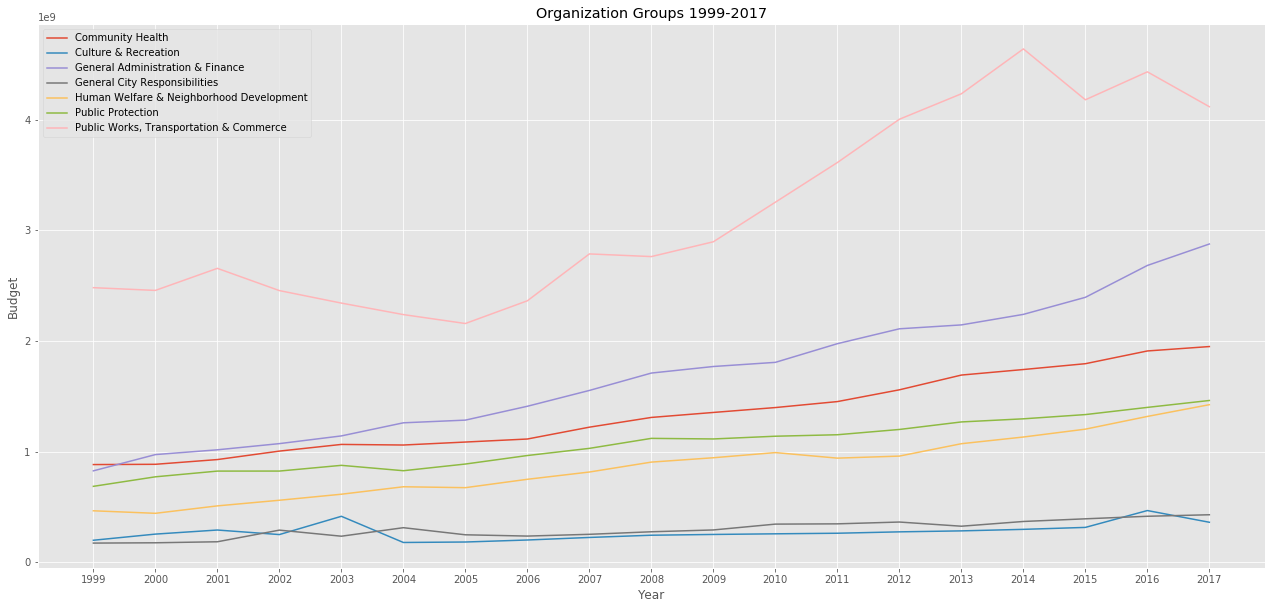

In [12]:
plt.figure(figsize=(22,10))

plt.title('Organization Groups 1999-2017')
plt.xlabel('Year')
plt.ylabel('Budget')

plt.xticks(np.arange(min(np.array(df_transp.index)), 
                     max(np.array(df_transp.index))+1, 1.0))
plt.yticks(np.arange(),
                     
                    )

for group in df_transp.columns:
    plt.plot(df_transp.index, np.array(df_transp[group]),
         label=group)
    
plt.legend()
plt.show()

In [32]:
plt.savefig('SF_org_groups_lineplot.png')

<Figure size 432x288 with 0 Axes>

In [13]:
df_agg

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Organization Group,,,,,,,,,,,,,,,,,,,
Community Health,8.819127e+08,8.842978e+08,9.271582e+08,1.003654e+09,1.064095e+09,1.058670e+09,1.085581e+09,1.112982e+09,1.220095e+09,1.308156e+09,1.353216e+09,1.397511e+09,1.451469e+09,1.557973e+09,1.691328e+09,1.741447e+09,1.794130e+09,1.909323e+09,1.949161e+09
Culture & Recreation,1.974674e+08,2.529972e+08,2.899114e+08,2.488100e+08,4.140045e+08,1.772903e+08,1.815215e+08,1.996677e+08,2.227399e+08,2.428873e+08,2.498701e+08,2.556029e+08,2.608336e+08,2.733905e+08,2.821998e+08,2.959834e+08,3.136054e+08,4.660505e+08,3.600183e+08
General Administration & Finance,8.251766e+08,9.721212e+08,1.015377e+09,1.071319e+09,1.141091e+09,1.259537e+09,1.283863e+09,1.409197e+09,1.552262e+09,1.709466e+09,1.768776e+09,1.806280e+09,1.975116e+09,2.109689e+09,2.144975e+09,2.240199e+09,2.394366e+09,2.682615e+09,2.876694e+09
General City Responsibilities,1.717337e+08,1.745403e+08,1.837020e+08,2.889807e+08,2.339664e+08,3.110360e+08,2.468325e+08,2.351464e+08,2.511699e+08,2.741652e+08,2.905794e+08,3.433227e+08,3.457813e+08,3.621585e+08,3.243361e+08,3.672386e+08,3.912837e+08,4.142998e+08,4.280393e+08
Human Welfare & Neighborhood Development,4.638600e+08,4.410693e+08,5.082278e+08,5.591605e+08,6.137050e+08,6.811500e+08,6.730001e+08,7.487133e+08,8.144332e+08,9.041823e+08,9.435892e+08,9.902222e+08,9.400372e+08,9.584808e+08,1.070584e+09,1.131055e+09,1.202186e+09,1.317164e+09,1.423495e+09
Public Protection,6.850420e+08,7.711356e+08,8.228407e+08,8.231038e+08,8.748278e+08,8.262609e+08,8.866845e+08,9.637010e+08,1.028381e+09,1.118819e+09,1.113571e+09,1.138247e+09,1.151597e+09,1.199353e+09,1.267413e+09,1.295625e+09,1.333976e+09,1.398936e+09,1.461445e+09
"Public Works, Transportation & Commerce",2.481711e+09,2.456951e+09,2.656389e+09,2.455332e+09,2.342223e+09,2.238240e+09,2.157588e+09,2.363097e+09,2.786993e+09,2.762879e+09,2.896900e+09,3.254778e+09,3.613409e+09,4.004832e+09,4.235159e+09,4.641050e+09,4.180932e+09,4.433690e+09,4.118238e+09


In [14]:
df_org_sums.to_csv('SF_spending_sums_organization_groups.csv')
df_org_sums

,Amount
Organization Group,
Community Health,2.539216e+10
Culture & Recreation,5.184852e+09
General Administration & Finance,3.223812e+10
General City Responsibilities,5.638312e+09
Human Welfare & Neighborhood Development,1.638431e+10
Public Protection,2.016096e+10
"Public Works, Transportation & Commerce",6.008039e+10


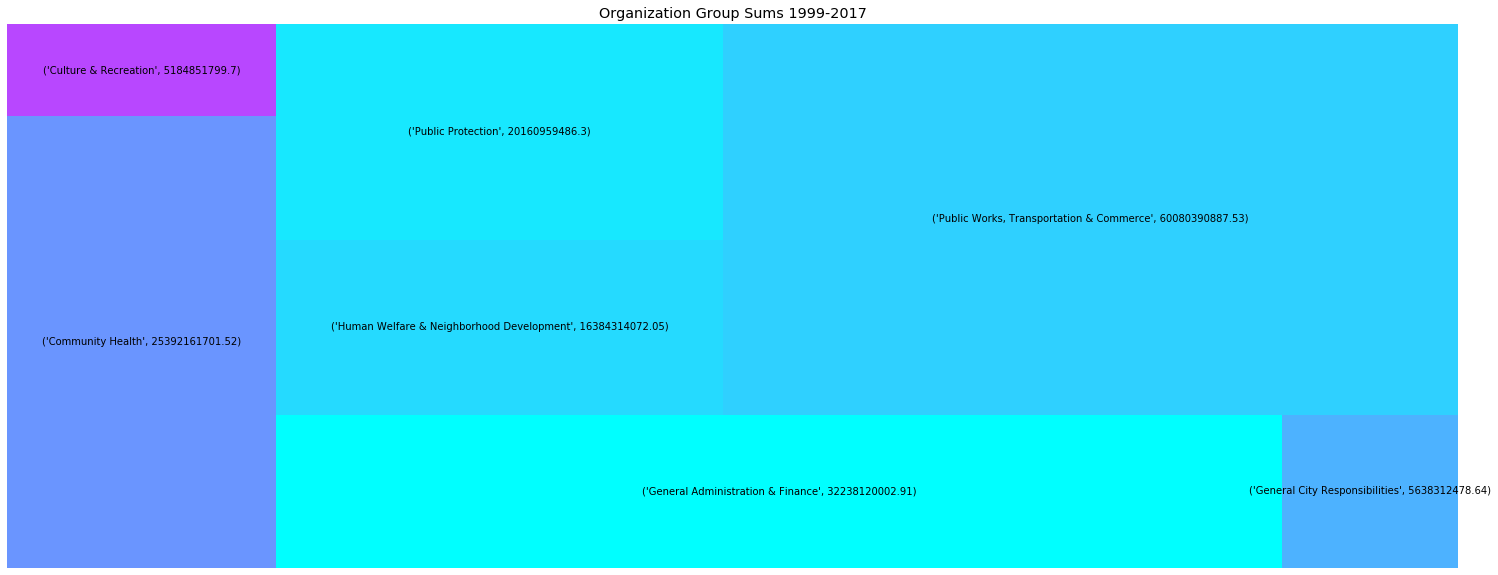

In [15]:

plt.figure(figsize=(26,10))
plt.title('Organization Group Sums 1999-2017')


sizes = df_org_sums['Amount']
label_sizes = df_org_sums['Amount'].round(2)
labels = list(zip(df_org_sums.index, label_sizes))

np.random.seed(seed=1)
colors = plt.cm.cool(np.random.rand(len(sizes)))

squarify.plot(
    sizes = sizes,
    color = colors,
    label = labels)

plt.axis('off')
plt.show()

In [33]:
plt.savefig('SF_org_groups_treemap.png')

<Figure size 432x288 with 0 Axes>